## LAB ML - Unbalanced Data

**Instructions**

1. Load the dataset and explore the variables.
2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
3. Extract the target variable.
4. Extract the independent variables and scale them.
5. Build the logistic regression model.
6. Evaluate the model.
7. Even a simple model will give us more than 70% accuracy. Why?
8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?
9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

from: https://github.com/ironhack-labs/lab-imbalanced-data

In [1]:
import pandas as pd
import numpy as np

#### 1. Load the dataset and explore the variables.

In [2]:
data = pd.read_csv('customer_churn.csv')

In [5]:
data.shape
#we have 7043 rows and 21 columns

(7043, 21)

In [6]:
data.columns
#we have the following columns

#we alread see that we should clean the column names to match (lowercase)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.dtypes
#there are only 3 columns with numerical data
#dont quiet know if the senior citizen column needs to be num, or if its supposed to be boolean


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data['SeniorCitizen'].unique()

#as I suspected, this is not a number, but a boolean
#you are either a senior citizen (1) or not (0)
#we could change the data type here from num to object

array([0, 1])

#### Splitting num and cat data

In [10]:
cat = data.select_dtypes(include = np.object)
num = data.select_dtypes(include=np.number)

#### Visualization 

numerical data

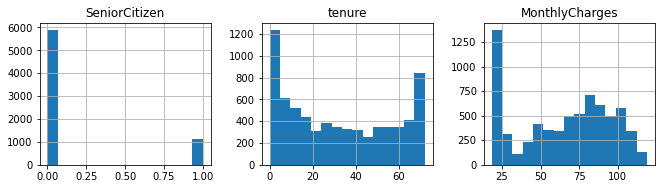

In [11]:
num.hist(bins=15, figsize=(15, 6), layout=(2, 4));

cat data

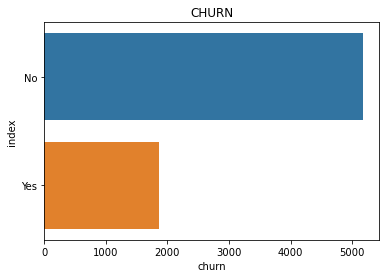

<Figure size 432x288 with 0 Axes>

In [90]:
cols_cat = ['churn']
for col in cols_cat:
    my_data = data[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
    plt.figure()
    print

In [93]:
data['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

#### Data cleaning

- standardize column names (all lowercase)
- change data type of seniorcitizen from num to cat

In [12]:
data.columns=[e.lower().replace(' ', '_') for e in data.columns]
data.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

### Pre Processing
- extract target var
- extract independed var
- scaling

extract target var

In [60]:
cat = pd.DataFrame(data['churn'])
cat

,churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [61]:
cat = pd.get_dummies(cat, columns =['churn'])

In [62]:
cat

,churn_No,churn_Yes
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
7038,1,0
7039,1,0
7040,1,0
7041,0,1


we want to predict, that a customer is not churning churn_no = 1

TP = we predict no churn, true 1;1
TN = we pedict churn, treu 0,1
FP = we preict no chrun, false 1,0
FN = we preidct churn, false 0;0

In [65]:
cat['churn_No'].value_counts()

1    5174
0    1869
Name: churn_No, dtype: int64

In [64]:
y = cat['churn_No']
y

0       1
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    1
Name: churn_No, Length: 7043, dtype: uint8

In [66]:
cat = cat.drop(['churn_No'], axis=1)
cat

,churn_Yes
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


extract independed var

In [18]:
X = num
X

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX1 = scaler.fit_transform(X)
rescaledX1

array([[0.        , 0.01388889, 0.11542289],
       [0.        , 0.47222222, 0.38507463],
       [0.        , 0.02777778, 0.35422886],
       ...,
       [0.        , 0.15277778, 0.11293532],
       [1.        , 0.05555556, 0.55870647],
       [0.        , 0.91666667, 0.86965174]])

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler().fit(X)
rescaledX2 = scaler.transform(X)
rescaledX2

array([[-0.43991649, -1.27744458, -1.16032292],
       [-0.43991649,  0.06632742, -0.25962894],
       [-0.43991649, -1.23672422, -0.36266036],
       ...,
       [-0.43991649, -0.87024095, -1.1686319 ],
       [ 2.27315869, -1.15528349,  0.32033821],
       [-0.43991649,  1.36937906,  1.35896134]])

In [26]:
from sklearn.preprocessing import Normalizer

In [27]:
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
normalizedX

array([[0.        , 0.03348205, 0.99943932],
       [0.        , 0.51260992, 0.85862161],
       [0.        , 0.03711462, 0.99931102],
       ...,
       [0.        , 0.34834554, 0.93736619],
       [0.01342027, 0.05368107, 0.99846795],
       [0.        , 0.52981853, 0.84811103]])

Merge X and the scaled variables

In [67]:
len(normalizedX), len(cat)

#DONT NEED TO MERGE them as cat is only churn and this is the dependend variable y

(7043, 7043)

In [78]:
X = normalizedX
X

array([[0.        , 0.03348205, 0.99943932],
       [0.        , 0.51260992, 0.85862161],
       [0.        , 0.03711462, 0.99931102],
       ...,
       [0.        , 0.34834554, 0.93736619],
       [0.01342027, 0.05368107, 0.99846795],
       [0.        , 0.52981853, 0.84811103]])

### Build the logistic regression model
- import model
- Train Test Split
- apply model

import model

In [29]:
from sklearn.linear_model import LogisticRegression

Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test,  y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=40)

model development

In [80]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter = 400, multi_class='ovr').fit(X_train,y_train)

In [81]:
predictions = classification.predict(X_test)
predictions

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

### Model Evaluation using Confusion Matrix


In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Building Confusion Matrix

In [82]:
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix

array([[ 347,  407],
       [ 266, 1798]])

Visualizing Confusion Matrix

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

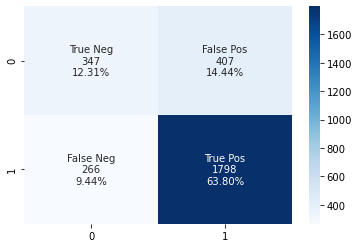

In [83]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

1    5174
0    1869
Name: churn_No, dtype: int64

In [94]:
data['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

**347 true negative predictions:** The first 347 observations are zeros predicted correctly.<br/>
**266 false negative predictions:** These 2266 are the ones wrongly predicted as zeros.<br/>
**407 false positive prediction:** The 407 observation are a zero that were wrongly predicted as one.<br/>
**1798 true positive predictions:** The last 1798 observations are ones predicted correctly.<br/><br/>

**conclusion:**
- the true neg are too few<br/>
- the fp and fn are somehow ok, but compared to the tn thats not good<br/>
    -> we have not that many TN because we only have 1869 0/Yes (26%) out of the total 7043<br/>
    -> churn is inbalanced, this is why we try again with more balanced data

**Metrics (accuracy, precision, recall)**

In [43]:
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [84]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))


Accuracy: 0.7611781405251952


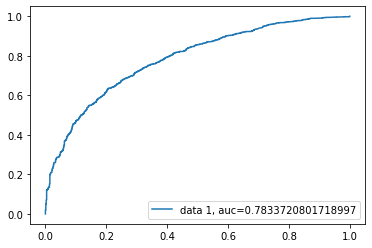

In [85]:
y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Conclusion:**
- 78% is already good, but we know this can be better because our data is imbalanced

## Balancing the data

first we try SMOTE, then Tomek

#### SMOTE

#import smothe
define variable smote = SMOTE()

recreate X and y using smote and resample over X an y
X-sm, y_sm = smote.fit_resample(X,y)


look at value counts for A/B 0/1
y_sm.value_coounts()
should be same amount

re do train test split with (X_sm,y_sm, test_size= etc

re do model

re do accuracy/confusion matrix and compare before and after
is it better/worse?

In [102]:
conda install -c conda-forge imbalanced-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | 
  - anaconda/osx-64::ca-certificates-2020.10.14-0
  - defaults/osx-64::ca-certificates-2020.10.14done

## Package Plan ##

  environment location: /Users/josephinebiedermann/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.0               |   py38h50d1736_1         3.1 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    openssl-1.1.1h             |       haf1e3a3_0         1.9 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                       

In [103]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [104]:
smote = SMOTE()

In [105]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

1    5174
0    5174
Name: churn_No, dtype: int64

In [109]:
#re do train test split It2

Xsm_train, Xsm_test, ysm_train, ysm_test =train_test_split(X_sm, y_sm, test_size= 0.4, random_state=40)

In [110]:
# apply model It2 
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(Xsm_train, ysm_train)

In [111]:
#accuracy assessment It2
predictions = classification.predict(Xsm_test)
accuracy_score(ysm_test, predictions)

0.7195652173913043

In [112]:
cnf_matrix = confusion_matrix(ysm_test, predictions)
cnf_matrix

array([[1559,  541],
       [ 620, 1420]])

<AxesSubplot:>

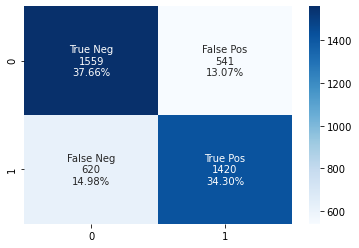

In [113]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

**Conclusion:**
- the confusion matrix looks better, tn and tp is more balanced
- no changes in fn and fp
- BUUUUT the AUC is worse :(

Lets try TOMEK then

#### TOMEK

In [114]:
from imblearn.under_sampling import TomekLinks

In [115]:
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

#doesnt look very promising
#no additional minority data
#few less of the majority

/Users/josephinebiedermann/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:635: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


1    4674
0    1869
Name: churn_No, dtype: int64

In [116]:
#re do train test split It3

Xtl_train, Xtl_test, ytl_train, ytl_test =train_test_split(X_tl, y_tl, test_size= 0.4, random_state=40)

In [117]:
# apply model It3
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(Xtl_train, ytl_train)

In [118]:
#accuracy assessment It3
predictions = classification.predict(Xtl_test)
accuracy_score(ytl_test, predictions)

0.7597402597402597

In [119]:
cnf_matrix = confusion_matrix(ytl_test, predictions)
cnf_matrix

array([[ 394,  350],
       [ 279, 1595]])

<AxesSubplot:>

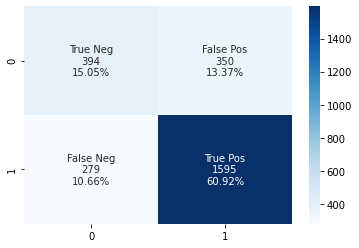

In [120]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

**Conclusion:**
- tn got a little better, but 

- AUC looks better then from SMOTE, BUT still worse then without balancing 
